In [27]:
%matplotlib inline

In [12]:
# import plotting tools
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib as mpl
import os
import gdal
from osgeo import osr

# import numpy
import numpy as np

# import necessary landlab components
from landlab import RasterModelGrid, HexModelGrid
from landlab.components import(FlowDirectorD8, 
                               FlowDirectorDINF, 
                               FlowDirectorMFD, 
                               FlowDirectorSteepest)

# import landlab plotting functionality
from landlab.plot.drainage_plot import drainage_plot

# create a plotting routine to make a 3d plot of our surface. 
def surf_plot(mg, surface='topographic__elevation', title='Surface plot of topography'):
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Plot the surface.
    Z = mg.at_node[surface].reshape(mg.shape)
    color = cm.gray((Z-Z.min())/(Z.max()-Z.min()))
    surf = ax.plot_surface(mg.node_x.reshape(mg.shape), mg.node_y.reshape(mg.shape), 
                           Z,
                           rstride=1, cstride=1,
                           facecolors=color,
                           linewidth=0., 
                           antialiased=False)
    ax.view_init(elev=35, azim=-120)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Elevation')
    plt.title(title)
    plt.show()

In [13]:
location = (r'C:/PhD/junk')
os.chdir(location)
ds = gdal.Open('gully_test.tif')
x = np.array(ds.GetRasterBand(1).ReadAsArray())
input_DEM = x[1:9, 1:9]

AttributeError: 'NoneType' object has no attribute 'GetRasterBand'

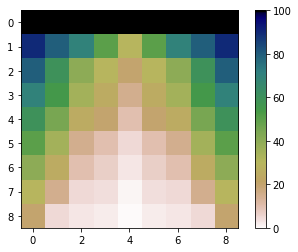

In [14]:
plt.imshow(input_DEM, cmap="gist_earth_r");
plt.colorbar();

In [90]:
input_DEM = np.array([[100, 100, 100, 100, 100, 100, 100, 100, 100],
                      [90, 85, 75, 70, 60, 70, 75, 85, 90],
                      [80, 75, 65, 60, 55, 60, 65, 75, 80],
                      [70, 65, 55, 45, 40, 45, 55, 65, 70],
                      [60, 55, 45, 40, 35, 40, 45, 55, 60],
                      [50, 45, 35, 30, 25, 30, 35, 45, 50],
                      [40, 35, 25, 20, 15, 20, 25, 35, 40],
                      [30, 25, 15, 10, 5,  10,  15, 25, 30],
                      [20,  5, 3,  2, 0,  2,  3,  5, 20]], dtype = 'Float64')

C:\Users\sjwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  if __name__ == '__main__':


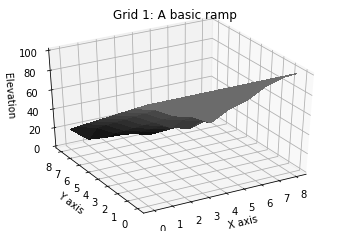

In [91]:
mg1 = RasterModelGrid((9,9), 1)
_ = mg1.add_field('topographic__elevation', input_DEM, at = 'node')

surf_plot(mg1, title='Grid 1: A basic ramp')

In [98]:
flow_acc_surf = np.copy(input_DEM).astype('float64');
rows = flow_acc_surf.shape[0];
cols = flow_acc_surf.shape[1];
mg1 = RasterModelGrid((rows,cols), 1);
z1 = mg1.add_field('topographic__elevation', flow_acc_surf, at = 'node');

In [99]:
fd = FlowDirectorMFD(mg1, 'topographic__elevation', diagonals = True)

In [100]:
fd.run_one_step()
receivers = fd.direct_flow()
print(receivers)

(array([[ 0, -1, -1, -1, -1, -1, -1, -1],
       [ 1, -1, -1, -1, -1, -1, -1, -1],
       [ 2, -1, -1, -1, -1, -1, -1, -1],
       [ 3, -1, -1, -1, -1, -1, -1, -1],
       [ 4, -1, -1, -1, -1, -1, -1, -1],
       [ 5, -1, -1, -1, -1, -1, -1, -1],
       [ 6, -1, -1, -1, -1, -1, -1, -1],
       [ 7, -1, -1, -1, -1, -1, -1, -1],
       [ 8, -1, -1, -1, -1, -1, -1, -1],
       [ 9, -1, -1, -1, -1, -1, -1, -1],
       [11, 19, -1, -1, 20, 18, -1, -1],
       [12, 20, -1, -1, 21, -1, -1, -1],
       [13, 21, -1, -1, 22, 20, -1, -1],
       [-1, 22, -1, -1, -1, -1, -1, -1],
       [-1, 23, 13, -1, 24, 22, -1, -1],
       [-1, 24, 14, -1, -1, 23, -1, -1],
       [-1, 25, 15, -1, 26, 24, -1, -1],
       [17, -1, -1, -1, -1, -1, -1, -1],
       [18, -1, -1, -1, -1, -1, -1, -1],
       [20, 28, -1, -1, 29, 27, -1, -1],
       [21, 29, -1, -1, 30, -1, -1, -1],
       [22, 30, -1, -1, 31, 29, -1, -1],
       [-1, 31, -1, -1, 32, 30, -1, -1],
       [-1, 32, 22, -1, 33, 31, -1, -1],
       [-1, 33,

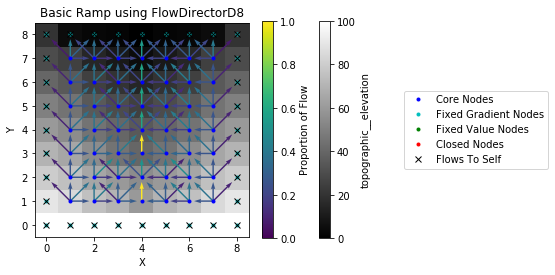

In [102]:
#fd = FlowDirectorSteepest(mg1, diagonals = True);
fd = FlowDirectorMFD(mg1, diagonals = True)
fd.run_one_step();
plt.figure();
drainage_plot(mg1, title='Basic Ramp using FlowDirectorD8');

In [10]:
 mg1.at_node.keys()

['topographic__elevation',
 'flow__link_to_receiver_node',
 'flow__receiver_node',
 'topographic__steepest_slope',
 'flow__sink_flag']

In [11]:
fd = FlowDirectorMFD(mg1, diagonals=True)
fd.run_one_step()
plt.figure()
drainage_plot(mg1, title='Basic Ramp using FlowDirectorMFD with diagonals')

ValueError: could not broadcast input array from shape (81,8) into shape (81)